In [5]:
import pandas as pd
import numpy as np
import plotly as plotly

In [6]:

df_energyco2 = pd.read_csv('../datasets/energyco2_normalizado.csv', delimiter= ";")
df_central_elec = pd.read_csv('../datasets/NORMALIZADO_central_electrica.csv',delimiter= ";")
#df_global_power_plant = pd.read_csv('../datasets/global_power_plant/global_power_plant_database.csv',delimiter= ",")
df_energia_renovable = pd.read_csv('../datasets/energias_renovables/NORMALIZADO_data_energia_renovable.csv',delimiter= ";")
df_energy_consumption = pd.read_csv('../datasets/energy_consumption/owid-energy-consumption-source_normalizado.csv',delimiter=";")
df_paris = pd.read_csv('../datasets/paris_agreement_ndcs/PA_NDCs.csv',delimiter=",")

In [9]:
df = df_energyco2[df_energyco2['Country'] == 'Argentina']
df = df[df['Energy_type']== 'all_energy_types']

df1 = df_energyco2[df_energyco2['Energy_type'] == 'all_energy_types']
#df1

In [52]:
df_emisiones2010 = df1[df1['Year'] == 2010]
df_emisiones2010 = df_emisiones2010[['Country','CO2_emission']].reset_index(drop = True)

df_top_2010 = df_emisiones2010.sort_values(by='CO2_emission',ascending=False).head(11)
df_top_2030 = df_top_2010[['Country',"CO2_emission"]]
df_top_2030["CO2_emission_2010"] = df_top_2030["CO2_emission"]
df_top_2030 =df_top_2030.drop("CO2_emission",axis=1)
df_top_2030['CO2_emission_esperado_2030'] = ((df_top_2030["CO2_emission_2010"] - (df_top_2030["CO2_emission_2010"]*45)/100))
df_top_2030= df_top_2030[df_top_2030['Country'] != 'World']

df_top_2030


,Country,CO2_emission_2010,CO2_emission_esperado_2030
41,China,8204.14,4512.2770
220,United States,5403.66,2972.0130
99,India,1546.55,850.6025
170,Russia,1505.59,828.0745
107,Japan,1144.88,629.6840
79,Germany,781.73,429.9515
190,South Korea,556.03,305.8165
36,Canada,541.45,297.7975
101,Iran,534.08,293.7440
219,United Kingdom,519.38,285.6590


In [139]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.bar(df_top_2030, x="Country", y='CO2_emission_2010')
fig.update_traces(marker_color='green')
fig2 = px.bar(df_top_2030, x="Country", y='CO2_emission_esperado_2030')
fig2.update_traces(marker_color='black')
go.Figure(fig.data + fig2.data)

In [329]:
df_pred = df1[['Country','Year','CO2_emission']]

df_pred = df_pred[df_pred['Country'] == 'United States']
df_pred = df_pred[df_pred['Year'] >= 2010]

df_pred

,Country,Year,CO2_emission
42900,United States,2010,5403.66
44286,United States,2011,5593.66
45672,United States,2012,5454.70
47058,United States,2013,5236.32
48444,United States,2014,5358.87
49830,United States,2015,5413.88
51216,United States,2016,5262.08
52602,United States,2017,5169.50
53988,United States,2018,5131.08
55374,United States,2019,5277.19


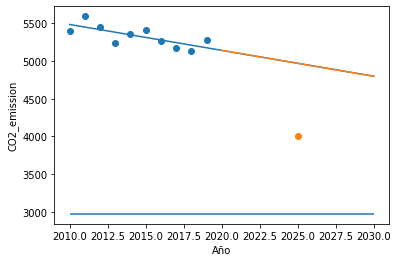

In [291]:
import matplotlib.pyplot as plt

annio = 2010

df_pred = df1[['Country','Year','CO2_emission']]

df_pred = df_pred[df_pred['Country'] == 'United States']
df_pred = df_pred[df_pred['Year'] >= annio]

X = df_pred.Year.values.reshape(-1,1)
y = df_pred.CO2_emission.values.reshape(-1,1)

# plt.scatter(X,y)
# plt.xlabel('Año')
# plt.ylabel('CO2_emission')

from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

pend = model.coef_[0][0]
orde = model.intercept_[0]

y_pred1 = [((i*pend)+ orde) for i in range(annio,2031)]

anios=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
y_pred = model.predict(np.array(anios).reshape(-1,1))

plt.scatter(X,y)
plt.xlabel('Año')
plt.ylabel('CO2_emission')

plt.plot(list(range(annio,2031)),y_pred1)
plt.hlines((df_pred.loc[df_pred['Year'] == 2010, 'CO2_emission'].values * 0.55),annio,2030)
plt.plot(anios,y_pred)
plt.scatter(2025,4000)


In [319]:
x = list(range(2015,2020)) + [4000]
print(x)


[2015, 2016, 2017, 2018, 2019, 4000]


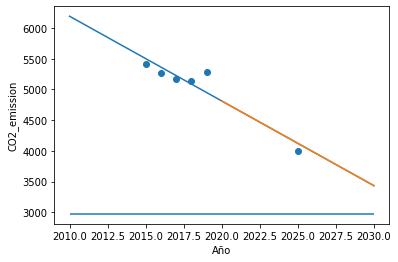

In [328]:
from sklearn.linear_model import LinearRegression
import numpy as np

y = np.append(df_pred.loc[df_pred['Year'] >= 2015, 'CO2_emission'].values.reshape(-1,1),4000)
x = np.append(list(range(2015,2020)), [2025]).reshape(-1,1)

co2_2019 = 5277.19

model_test = LinearRegression(fit_intercept=True)
model_test.fit(x, y)
y_pred = model_test.predict(X)
#print(model_test.coef_)
pend = model_test.coef_[0]
orde = model_test.intercept_

y_pred1 = [((i*pend)+ orde) for i in range(annio,2031)]

anios=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
y_pred = model_test.predict(np.array(anios).reshape(-1,1))

plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('CO2_emission')

plt.plot(list(range(annio,2031)),y_pred1)
plt.hlines((df_pred.loc[df_pred['Year'] == 2010, 'CO2_emission'].values * 0.55),annio,2030)
plt.plot(anios,y_pred)

